# Data analysis 
(New Replacement)

<br>
Qidu Fu
<br>
3/14/2025
<br>
<br>

**Contents**
- [0 Load data](#0-load-data)
- [1 Detect code-switching](#1-detect-code-switching)
    - [1.1 Experiment with regex](#11-experiment-with-regex)
    - [1.2 Experiment with langdetect](#12-experiment-with-the-library-langdetect)
    - [1.3 Experiment with langid](#13-experiment-with-the-library-langid)
    - [1.4 Apply code-switching detection](#14-apply-code-switching-detection)
- [2 Conduct topic modeling](#2-conduct-topic-modeling-to-aggregatecluster-the-topics)
    - [2.1 Use K-Means](#21-use-k-means)
    - [2.2 Use LDA](#22-use-lda)
    - [2.3 Use WordCloud](#23-use-wordcloud-to-visualize-the-clusters)
    - [2.4 Apply topic modeling](#24-apply-topic-modeling-assign-topics)
- [3 Analyze the topic distribution](#3-analyze-the-topic-distribution-exploratory-analysis)

## 0 Load data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

RANDOM_STATE = 100

In [2]:
STACK_DF = pd.read_csv('private/stack_exchange_cleaned.csv')
STACK_DF.head()

,text,topic
0,My translation of Li Bai's 《三五七言》,"translation, poetry"
1,What do these characters on an antique mural p...,"character identification, traditional characte..."
2,Help in translating Li Bai's 《月下独酌·其二》,"translation, poetry"
3,purpose of using 了 with 要不,grammar
4,Why does the character 的 is pronounced differe...,"pronunciation, songs"


In [3]:
STACK_DF.sample(20)

,text,topic
2985,the difference between 出价 发价 报价 提价,"meaning, difference"
5930,"What is the meaning of ""比一比"" in 一件件新衣向身上比一比?","translation, meaning"
7839,"At what situations should I leave out 话 in ""~的话""",grammar
3284,Web Developer Vocabulary,"resources, terminology, technology"
9751,"Tips for pronunciating tone value ""21""?","pronunciation, tones"
10427,What does bianniu 变牛 mean?,meaning
6135,"Is ""那些你很冒險的夢"" a common expression or just a so...","translation, grammar"
6156,自习 vs 自学: what's the difference?,"meaning, difference"
186,Using 有 or 是 to describe amount,"grammar, verbs, quantity"
481,What are these courtesy names and given names?...,"translation, meaning, meaning in context, usag..."


In [4]:
STACK_DF.iloc[160, ]

text     Chinese bronze dagger inscriptions
topic      meaning, characters, calligraphy
Name: 160, dtype: object

In [5]:
STACK_DF.iloc[10498, ]

text     不得不, 必须, 只好, 应该: what's the difference?
topic                      word choice, mandarin
Name: 10498, dtype: object

In [6]:
sample_idx = np.random.choice(STACK_DF.index, 25, replace=False)
STACK_DF.loc[sample_idx, 'text']

10124    Phrase to describe "wow" or "amazing" (sounds ...
1529     How do you refer to a non-binary sibling in Ma...
788      How many unique glyphs do you need to know to ...
1796     How would you say "The mother wants her child ...
5798                    What is a "functional drink" 机能饮料?
8424                                    What does 央企 mean?
2044                            Who was 赵王 after 赵奢 in 赵国?
5563     The word "why": what's the difference between ...
3451                         Difference between 整理 and 收拾?
8277     Is it possible to use 比如 at the end of a list ...
5138                                 A joke involving 忆苦思甜
4954            Difference between Verb + 不了 and Verb + 不动
8479                                   What does 什么叫 mean?
5070               How many characters do I need to learn?
4845                Is 纟 obtained by simplification of 糸 ？
2161     A: 回来用隔离不 ("when you return, do you need to is...
9939     Hong Kong Cantonese: Derogatory Terms For Main.

## 1 Detect code-switching
- Using regex to detect code-switching sentences, which produce to consistent results, through human checking (the author) of a 300-records of sample data
- However, using langdetect, the library, does not produce accuracy results; therefore, it is not  used. 
- Similar to langdetect, langid does not produce accurate results; therefore, it is not used. These libraries work well with long text; however, the posts are short. This may explain the reason.
- Apply the regex to detect the CS. 

### 1.1 Experiment with regex

In [7]:
def detect_code_switching_regex(text):
    """
    Detects code-switching between Chinese and English in the provided text.
    
    Parameters:
    text (str): The input text in which code-switching is to be detected.
    
    Returns:
    bool: True if both Chinese characters and English letters are found in the text, 
            False otherwise.
    """
    contains_chinese = bool(re.search(r'[\u4e00-\u9fff]', text))
    contains_english = bool(re.search(r'[a-zA-Z]', text))
    return contains_chinese and contains_english

STACK_DF.loc[sample_idx, 'text'].apply(detect_code_switching_regex)

10124    False
1529     False
788      False
1796     False
5798      True
8424      True
2044      True
5563      True
3451      True
8277      True
5138      True
4954      True
8479      True
5070     False
4845      True
2161      True
9939     False
2862     False
3246      True
3782      True
3230      True
3753      True
396       True
8176     False
9204     False
Name: text, dtype: bool

### 1.2 Experiment with the library langdetect 

In [8]:
# Install langdetect
# !pip3 install langdetect

In [9]:
from langdetect import detect_langs

def detect_code_switching_langdetect(text):
    """
    Detects code-switching between Chinese and English in the provided text using the langdetect library.
    
    Parameters:
    text (str): The input text in which code-switching is to be detected.
    
    Returns:
    bool: True if both Chinese ('zh-cn') and English ('en') are detected in the text, False otherwise.
    """
    try:
        # Detect languages in the text
        langs = detect_langs(text)
        # Extract language codes
        lang_codes = [lang.lang for lang in langs]
        # Check if both Chinese and English are present
        return 'zh-cn' in lang_codes and 'en' in lang_codes
    except Exception as e:
        # Return False if an error occurs (e.g., invalid text format)
        return False

print('abd 我爱你: ', detect_code_switching_langdetect('abd 我爱你'))
STACK_DF.loc[sample_idx, 'text'].apply(detect_code_switching_langdetect)

abd 我爱你:  False


10124    False
1529     False
788      False
1796     False
5798     False
8424     False
2044     False
5563     False
3451     False
8277     False
5138     False
4954     False
8479     False
5070     False
4845     False
2161     False
9939     False
2862     False
3246     False
3782     False
3230     False
3753     False
396      False
8176     False
9204     False
Name: text, dtype: bool

### 1.3 Experiment with the library: langid

In [10]:
# Install library
# !pip3 install langid


In [11]:
import langid

def detect_code_switching_langid(text):
    """
    Detects code-switching between Chinese and English in the provided text using langid.
    
    Parameters:
    text (str): The input text in which code-switching is to be detected.
    
    Returns:
    bool: True if both Chinese ('zh') and English ('en') are detected in the text, False otherwise.
    """
    try:
        # Classify the text to detect language
        detected_languages = langid.classify(text)  # returns a tuple: (language_code, probability)
        detected_lang_code = detected_languages[0]

        # Check if both Chinese and English are detected
        if 'zh' in detected_lang_code and 'en' in detected_lang_code:
            return True
        else:
            return False
    except Exception as e:
        # Return False if an error occurs
        return False

# Apply the function to your DataFrame
STACK_DF.loc[sample_idx, 'text'].apply(detect_code_switching_langid)


10124    False
1529     False
788      False
1796     False
5798     False
8424     False
2044     False
5563     False
3451     False
8277     False
5138     False
4954     False
8479     False
5070     False
4845     False
2161     False
9939     False
2862     False
3246     False
3782     False
3230     False
3753     False
396      False
8176     False
9204     False
Name: text, dtype: bool

### 1.4 Apply code-switching detection

In [12]:
STACK_DF['code_switching'] = STACK_DF['text'].apply(detect_code_switching_regex)
STACK_DF.sample(10)

,text,topic,code_switching
9877,"""There was no attitude of poverty in his poetr...","classical chinese, traditional characters, poe...",True
5023,Chinese word well illustrated graphically,"characters, simplified characters",False
2696,Difference between 還沒 & 還不,"usage, word",True
3399,Character Pronunciation Clues,"reading, pronunciation, tones",False
5796,How many words for I are there in Chinese?,word,False
4238,Is there a standard for how wildcards are deal...,dictionary,False
5239,What semantic notions underlie 心 ('heart') wit...,"etymology, glyph origin",True
11818,Why is 土著人 used for Aboriginal people in Austr...,meaning,True
5725,What would a straight Chinese man say to descr...,word choice,False
1667,where to find 簡筆字?,"traditional characters, character variant",True


In [13]:
# Rearrange the columns
STACK_DF = STACK_DF[['text', 'code_switching', 'topic']]
STACK_DF.head()

,text,code_switching,topic
0,My translation of Li Bai's 《三五七言》,True,"translation, poetry"
1,What do these characters on an antique mural p...,False,"character identification, traditional characte..."
2,Help in translating Li Bai's 《月下独酌·其二》,True,"translation, poetry"
3,purpose of using 了 with 要不,True,grammar
4,Why does the character 的 is pronounced differe...,True,"pronunciation, songs"


## 2. Conduct topic modeling to aggregate/cluster the topics
As mentioned in the previous Jupyter Notebook, the original topics were more than 3000 using value counts. Therefore, further aggregation/clustering is needed. 
Based on the K-Means, I decided 6 topics might work the best. Using 6 topics with LDA mode, I interpreted and categorized the text into the following six categories/topics/domains (according to LDA):
<br>

0) word choice, phrase, sentence structure
1) idioms
2) grammar, meaning
3) Mandarin, character
4) characters, synonyms, topolects
5) differences: writing, speech


### 2.1 Use K-Means

- Based on KMeans' inertia plot, 6 clusters may be used.

In [14]:
STACK_DF.topic.value_counts()

translation                                                            974
grammar                                                                601
meaning                                                                464
meaning in context                                                     238
word choice                                                            217
                                                                      ... 
terms of address, formal                                                 1
meaning in context, etymology, character identification                  1
idioms, colloquialisms                                                   1
character identification, traditional characters, seal, old chinese      1
translation, style                                                       1
Name: topic, Length: 3502, dtype: int64

In [15]:
# Use Kmeans clustering to find the optimal number of clusters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

def topic_model_kmeans(vectorizer, n_clusters=5):
    """
    Creates a KMeans clustering model pipeline using a given vectorizer.

    Parameters:
    vectorizer (object): A vectorizer (e.g., TfidfVectorizer) to be used in the pipeline.
    n_clusters (int): The number of clusters to form. Default is 5.

    Returns:
    pipeline: A scikit-learn pipeline with the provided vectorizer and KMeans model.
    """
    kmeans = KMeans(n_clusters=n_clusters)
    # Create a pipeline with the provided vectorizer and KMeans model
    pipeline = make_pipeline(vectorizer, kmeans)
    return pipeline

In [16]:
def plot_inertia(STACK_DF, pipeline, max_clusters=10, random_state=RANDOM_STATE):
    """
    Plots the inertia for different numbers of clusters to help identify the optimal number.

    Parameters:
    STACK_DF (DataFrame): The input DataFrame containing text data in the 'topic' column.
    pipeline (object): A scikit-learn pipeline to be used for fitting the data.
    max_clusters (int): The maximum number of clusters to test. Default is 10.

    Returns:
    None: This function only generates and displays a plot of inertia values.
    """
    inertia = []  # List to store inertia values
    
    # Loop through different numbers of clusters
    for n in range(1, max_clusters + 1):
        # Update the pipeline with the current number of clusters
        pipeline.set_params(kmeans__n_clusters=n, 
                                kmeans__random_state=random_state)
        
        # Fit the pipeline to the data
        pipeline.fit(STACK_DF['topic'])
        
        # Get the KMeans model from the pipeline
        kmeans = pipeline.named_steps['kmeans']
        
        # Append the inertia value for the current model
        inertia.append(kmeans.inertia_)
    
    # Plot inertia to visualize the optimal number of clusters
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('KMeans Inertia')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    # save the plot to images/
    plt.savefig('images/kmeans_inertia.png')
    plt.show()

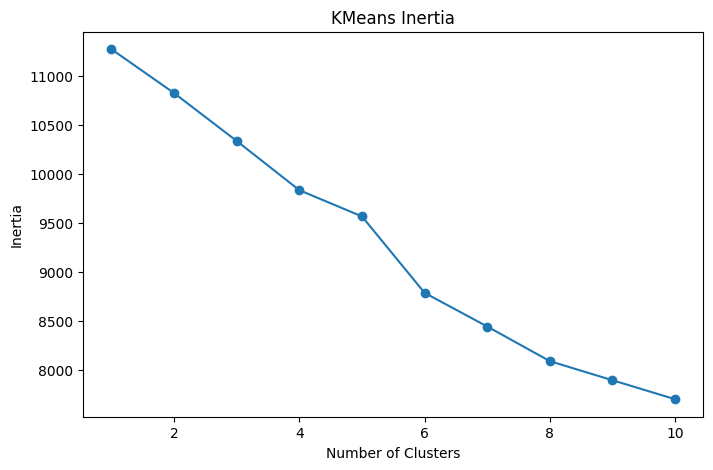

In [17]:
import nltk
# Define a vectorizer
vectorizer = TfidfVectorizer(max_features=10000, stop_words=None, 
                                ngram_range=(1, 2), 
                                tokenizer=nltk.word_tokenize,
                                token_pattern=None)

# Create a pipeline with the vectorizer
kmeans_pipeline = topic_model_kmeans(vectorizer)

# Test with a random sample from your DataFrame
# sample_idx = np.random.choice(STACK_DF.index, 300, replace=False)
plot_inertia(STACK_DF, kmeans_pipeline, max_clusters=10)

In [18]:
# Retrain the model with the optimal number of clusters: 6
kmeans_pipeline.set_params(kmeans__n_clusters=6, 
                            kmeans__random_state=RANDOM_STATE)
kmeans_pipeline.fit(STACK_DF['topic'])

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 token_pattern=None,
                                 tokenizer=<function word_tokenize at 0x30cb08700>)),
                ('kmeans', KMeans(n_clusters=6, random_state=100))])

In [19]:
def get_top_keywords(pipeline, n_terms=10):
    """
    Extracts the top keywords for each cluster in a KMeans model.
    
    Parameters:
    pipeline (Pipeline): A trained scikit-learn pipeline containing a TfidfVectorizer and KMeans model.
    n_terms (int): The number of top words to extract per cluster.
    
    Returns:
    DataFrame: A DataFrame showing the top keywords for each cluster.
    """
    # Extract the vectorizer and KMeans model from the pipeline
    vectorizer = pipeline.named_steps['tfidfvectorizer']
    kmeans = pipeline.named_steps['kmeans']
    
    # Get feature names (words) from the TF-IDF vectorizer
    feature_names = np.array(vectorizer.get_feature_names_out())
    
    # Identify the top words for each cluster
    top_keywords = []
    for cluster in range(kmeans.n_clusters):
        # Get indices of top TF-IDF words in the cluster centroid
        top_indices = kmeans.cluster_centers_[cluster].argsort()[-n_terms:][::-1]
        top_words = feature_names[top_indices]
        top_keywords.append(top_words)
    
    # Create a DataFrame for better visualization
    topic_df = pd.DataFrame(top_keywords, 
                            index=[f"Cluster {i}" for i in range(kmeans.n_clusters)], 
                            columns=[f"Word {i+1}" for i in range(n_terms)])
    
    return topic_df

# Run the function to get top words per cluster
kmeans_top_words_df = get_top_keywords(kmeans_pipeline, n_terms=20)
kmeans_top_words_df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20
Cluster 0,",",word,difference,word choice,choice,vocabulary,usage,etymology,"translation ,",", word",pronunciation,"meaning ,",mandarin,translation,meaning,"choice ,",", difference","grammar ,","mandarin ,",grammar
Cluster 1,meaning,meaning in,context,in,in context,", meaning",",","context ,","translation ,","meaning ,",translation,"grammar ,",grammar,word,"usage ,",", word",usage,", phrase",phrase,"choice ,"
Cluster 2,identification,character identification,character,", character","identification ,",",",", seal",seal,"translation ,",translation,characters,"characters ,","seal ,",", calligraphy",calligraphy,"meaning ,",meaning,", characters",", meaning",traditional characters
Cluster 3,grammar,"grammar ,",",",", grammar","translation ,",", usage",usage,translation,", sentence",", particles",", mandarin",sentence,particles,sentence structure,structure,mandarin,", meaning",", vocabulary",vocabulary,meaning
Cluster 4,characters,"characters ,",",",simplified,simplified characters,traditional,", characters",traditional characters,", simplified",", traditional","translation ,",translation,", etymology",", glyph","meaning ,",etymology,origin,glyph,glyph origin,"mandarin ,"
Cluster 5,translation,art,", 了",abbreviations,academic,"academic ,",accent,address,"address ,",adjectives,"adjectives ,",adverbs,"adverbs ,",ambiguity,"ambiguity ,",antonyms,了,", zhuyin",audio,"audio ,"


### 2.2 Use LDA
Based on KMeans, 6 topics may be good. Therefore, 6 topics are used in the LDA model training.

In [20]:
# Use LDA for topic modeling
from sklearn.decomposition import LatentDirichletAllocation

def topic_model_lda(vectorizer, n_topics=5, random_state=RANDOM_STATE):
    """
    Creates an LDA topic modeling pipeline using a given vectorizer.

    Parameters:
    vectorizer (object): A vectorizer (e.g., TfidfVectorizer) to be used in the pipeline.
    n_topics (int): The number of topics to generate. Default is 5.

    Returns:
    pipeline: A scikit-learn pipeline with the provided vectorizer and LDA model.
    """
    lda = LatentDirichletAllocation(n_components=n_topics, 
                                        random_state=random_state)
    # Create a pipeline with the provided vectorizer and LDA model
    pipeline = make_pipeline(vectorizer, lda)
    return pipeline

lda_pipeline = topic_model_lda(vectorizer, n_topics=6)
lda_pipeline

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 token_pattern=None,
                                 tokenizer=<function word_tokenize at 0x30cb08700>)),
                ('latentdirichletallocation',
                 LatentDirichletAllocation(n_components=6, random_state=100))])

In [21]:
# Evaluate the LDA model
def get_and_display_topics(model, feature_names, n_top_words=10):
    """
    Displays the top words for each topic in an LDA model and returns a DataFrame.

    Parameters:
    model (object): A trained LDA model.
    feature_names (list): A list of words obtained from the vectorizer's get_feature_names() method.
    n_top_words (int): The number of top words to display for each topic. Default is 10.

    Returns:
    DataFrame: A DataFrame containing the top words for each topic.
    """
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
        message = f"Topic {topic_idx}: " + " ".join(top_words)
        print(message)
    
    # Create a DataFrame with the top words for each topic
    topics_df = pd.DataFrame(topics, columns=[f'Word {i+1}' for i in range(n_top_words)])
    return topics_df

# Fit the LDA model to the data
lda_pipeline.fit(STACK_DF.loc[sample_idx, 'topic'])

# Get the LDA model from the pipeline
lda_model = lda_pipeline.named_steps['latentdirichletallocation']

# Get the feature names from the vectorizer
lda_feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic and display them
lda_top_words_df = get_and_display_topics(lda_model, lda_feature_names, n_top_words=10)

# Display the DataFrame with the top words for each topic
# print(lda_top_words_df)


Topic 0: meaning history input methods input methods difference , characters characters , grammar
Topic 1: word requests requests difference , word grammar grammar , , word , usage usage
Topic 2: word word choice choice , meaning choice , in context in context meaning in
Topic 3: , negation negation character components , character components character , grammar grammar , characters
Topic 4: translation translation , , meaning meaning , meaning , in context meaning in context in
Topic 5: , vocabulary vocabulary choice , choice word choice , word difference characters , characters


In [22]:
def get_top_features_by_topic_with_std(lda_pipeline, n_features=10):
    """
    Extracts the top features for each topic in an LDA model and calculates the STD for each feature.
    
    Parameters:
    lda_pipeline (object): The LDA pipeline containing both the vectorizer and the trained LDA model.
    n_features (int): The number of top features to extract per topic. Default is 10.
    
    Returns:
    DataFrame: A DataFrame showing the top features for each topic along with their STD.
    """
    # Get the LDA model and vectorizer from the pipeline
    vectorizer = lda_pipeline.named_steps['tfidfvectorizer']  # Assuming 'tfidfvectorizer' as the vectorizer step name
    lda_model = lda_pipeline.named_steps['latentdirichletallocation']
    
    # Get the feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    # Transform the data (assuming STACK_DF['topic'] contains the text data)
    data = vectorizer.transform(STACK_DF.loc[sample_idx, 'topic'])
    
    # Get the topic distribution for each document
    doc_topic_distr = lda_model.transform(data)
    
    # Initialize an empty DataFrame to store the results
    topic_features_df = pd.DataFrame()
    
    # Loop through each topic
    for topic_idx, topic in enumerate(lda_model.components_):
        # Get the data points that belong to this topic
        topic_data = data[np.argmax(doc_topic_distr, axis=1) == topic_idx]
        
        # Calculate the STD for each feature in this topic
        std_devs = np.std(topic_data.toarray(), axis=0)
        
        # Get the top features (words) for this topic based on STD
        top_topic_features = std_devs.argsort()[::-1][:n_features]
        
        # Create a DataFrame with the top features and their STD
        topic_df = pd.DataFrame()
        topic_df['feature'] = [feature_names[i] for i in top_topic_features]
        topic_df['std_dev'] = std_devs[top_topic_features]
        topic_df['topic'] = topic_idx
        
        # Append the topic results to the final DataFrame
        topic_features_df = pd.concat([topic_features_df, topic_df])
    
    return topic_features_df

lda_topic_features_df = get_top_features_by_topic_with_std(lda_pipeline, 
                                                            n_features=200)

print(lda_topic_features_df.shape)
lda_topic_features_df.head()



(348, 3)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


,feature,std_dev,topic
0,history,0.471405,0
1,meaning,0.471405,0
2,input,0.272166,0
3,input methods,0.272166,0
4,methods,0.272166,0


### 2.3 Use WordCloud to visualize the clusters

In [23]:
# Install wordcloud
# !pip3 install wordcloud

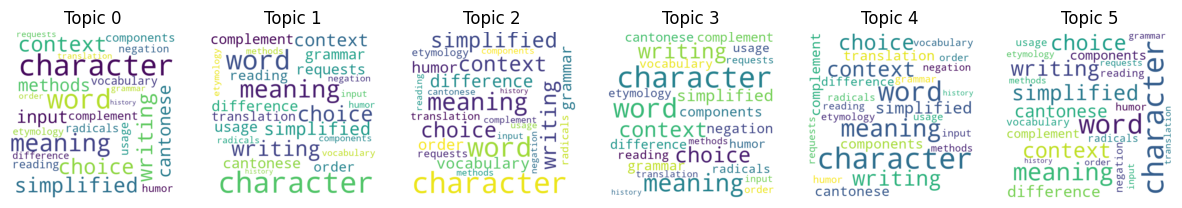

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordclouds(lda_topic_features_df, n_features=10):
    """
    Generates a word cloud for each topic based on the top features in lda_topic_features_df.
    
    Parameters:
    lda_topic_features_df (DataFrame): DataFrame containing top features per topic.
    n_features (int): The number of top features to extract per topic for the word clouds.
    
    Returns:
    None: Displays word clouds for each topic.
    """
    # Number of topics
    n_topics = lda_topic_features_df['topic'].nunique()
    
    # Initialize the figure to display word clouds for each topic
    fig, axes = plt.subplots(1, n_topics, figsize=(15, 5))
    
    # If only one topic, make sure axes is iterable
    if n_topics == 1:
        axes = [axes]
    
    # Loop through each topic and generate a word cloud
    for topic_idx in range(n_topics):
        # Get the top words for this topic
        topic_words = lda_topic_features_df[lda_topic_features_df['topic'] == topic_idx]
        top_words = topic_words['feature'].head(n_features).values
        
        # Create a string of top words to be used in the word cloud
        text = " ".join(top_words)
        
        # Generate the word cloud
        wordcloud = WordCloud(width=500, height=500, background_color="white").generate(text)
        
        # Display the word cloud
        axes[topic_idx].imshow(wordcloud, interpolation="bilinear")
        axes[topic_idx].axis("off")
        axes[topic_idx].set_title(f"Topic {topic_idx}")
    # save plot
    plt.savefig('images/wordclouds.png')
    plt.show()

plot_wordclouds(lda_topic_features_df, n_features=200)  


In [25]:
def print_top_30_by_topic(df, topic):
    print('Top 30 words by std for topic:', topic, '-------' * 10)
    return(df[df['topic'] == topic].head(30))

In [26]:
print_top_30_by_topic(lda_topic_features_df, 0)

Top 30 words by std for topic: 0 ----------------------------------------------------------------------


,feature,std_dev,topic
0,history,0.471405,0
1,meaning,0.471405,0
2,input,0.272166,0
3,input methods,0.272166,0
4,methods,0.272166,0
5,"writing ,",0.000000,0
6,"cantonese ,",0.000000,0
7,components,0.000000,0
8,complement,0.000000,0
9,"choice ,",0.000000,0


In [27]:
# Print the top 30 words for topic 1
print_top_30_by_topic(lda_topic_features_df, 1)

Top 30 words by std for topic: 1 ----------------------------------------------------------------------


,feature,std_dev,topic
0,difference,0.372678,1
1,word requests,0.258355,1
2,requests,0.258355,1
3,", usage",0.205368,1
4,usage,0.205368,1
5,cantonese,0.171724,1
6,"cantonese ,",0.171724,1
7,grammar,0.168994,1
8,"grammar ,",0.168994,1
9,", word",0.163174,1


In [28]:
# Print the top 30 words for topic 2
print_top_30_by_topic(lda_topic_features_df, 2)

Top 30 words by std for topic: 2 ----------------------------------------------------------------------


,feature,std_dev,topic
0,word,0.303259,2
1,choice,0.250966,2
2,word choice,0.250966,2
3,meaning,0.204753,2
4,", meaning",0.172518,2
5,"choice ,",0.161400,2
6,", difference",0.152270,2
7,vocabulary,0.148229,2
8,", vocabulary",0.148229,2
9,word order,0.145643,2


In [29]:
# Print the top 30 words for topic 3
print_top_30_by_topic(lda_topic_features_df, 3)

Top 30 words by std for topic: 3 ----------------------------------------------------------------------


,feature,std_dev,topic
0,negation,0.275530,3
1,", negation",0.275530,3
2,", character",0.213455,3
3,components,0.213455,3
4,character components,0.213455,3
5,character,0.213455,3
6,grammar,0.204712,3
7,"grammar ,",0.204712,3
8,"characters ,",0.171952,3
9,characters,0.171952,3


In [30]:
# Print the top 30 words for topic 4
print_top_30_by_topic(lda_topic_features_df, 4)

Top 30 words by std for topic: 4 ----------------------------------------------------------------------


,feature,std_dev,topic
0,translation,0.246534,4
1,"translation ,",0.238888,4
2,", meaning",0.217136,4
3,meaning,0.186479,4
4,",",0.117199,4
5,cantonese,0.000000,4
6,context,0.000000,4
7,components,0.000000,4
8,complement,0.000000,4
9,"choice ,",0.000000,4


In [31]:
# Print the top 30 words for topic 5
print_top_30_by_topic(lda_topic_features_df, 5)

Top 30 words by std for topic: 5 ----------------------------------------------------------------------


,feature,std_dev,topic
0,"writing ,",NaN,5
1,cantonese,NaN,5
2,difference,NaN,5
3,"context ,",NaN,5
4,context,NaN,5
5,components,NaN,5
6,complement,NaN,5
7,"choice ,",NaN,5
8,choice,NaN,5
9,"characters ,",NaN,5


### 2.4 Apply topic modeling: assign topics

In [32]:
# Use the LDA model and assign topics to the entire dataset
# 0) word choice, phrase, sentence structure
# 1) idioms
# 2) grammar, meaning
# 3) Mandarin, character
# 4) characters, synonyms, topolects
# 5) differences: writing, speech
STACK_DF['topic_idx'] = lda_pipeline.transform(STACK_DF['topic']).argmax(axis=1)
# Map the topic numbers to the topic names
topic_map = {
    0: 'word choice, phrase, sentence structure',
    1: 'idioms',
    2: 'grammar, meaning',
    3: 'Mandarin, character',
    4: 'characters, synonyms, topolects',
    5: 'difference: writing, speech'
}
STACK_DF['topic_lda'] = STACK_DF['topic_idx'].map(topic_map)
STACK_DF.sample(10)

,text,code_switching,topic,topic_idx,topic_lda
11090,How do you use the phrase 留宿 （liu2su4） （i.e. “...,True,vocabulary,5,"difference: writing, speech"
7170,Asking close friends what they like as souveni...,False,"mandarin, cantonese, sentence structure",1,idioms
10040,Difference between 能 and verb + 得了(de liao3),True,"grammar, word choice, usage, difference",2,"grammar, meaning"
10001,"How to parse ""就算世界与我为敌""?",True,"translation, meaning",4,"characters, synonyms, topolects"
3200,Is the measure word optional in 这件毛衣?,True,grammar,1,idioms
3273,When is it okay to omit the localizer (e.g. 上、...,True,grammar,1,idioms
7204,What does 惊鸿 mean in this context?,True,meaning in context,2,"grammar, meaning"
11318,How do Chinese judge the right sound quality (...,True,grammar,1,idioms
5273,"Does Chinese have a phrase equivalent to ""For ...",False,"mandarin, word choice, equivalent phrase, phrase",2,"grammar, meaning"
433,Why was the Secret Service translated into 特勤局?,True,translation,4,"characters, synonyms, topolects"


## 3 Analyze the topic distribution: exploratory analysis

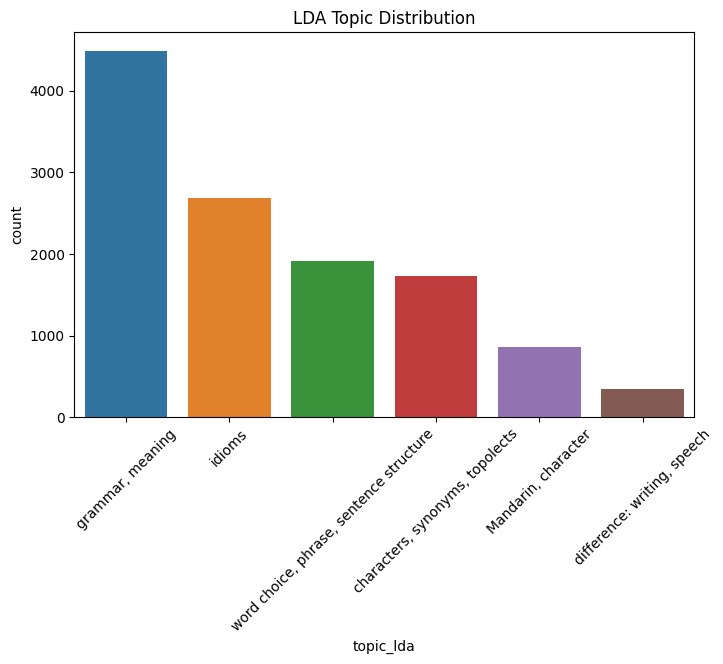

In [33]:
# Display the distribution of topics
def plot_topic_distribution(df, topic_col, title):
    """
    Plots the distribution of topics in a DataFrame.
    
    Parameters:
    df (DataFrame): The input DataFrame containing the topics.
    topic_col (str): The column name containing the topics.
    title (str): The title of the plot.
    
    Returns:
    None: This function displays a plot.
    """
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=topic_col, 
                    order=df[topic_col].value_counts().index)
    # Rotate x-labels for better readability
    plt.xticks(rotation=45)
    plt.title(title)
    # save the plot
    plt.savefig('images/topic_distribution.png')
    plt.show()

plot_topic_distribution(STACK_DF, 'topic_lda', 'LDA Topic Distribution')

In [34]:
# save the dataframe to a new csv file
STACK_DF.to_csv('private/stack_exchange_topics.csv', index=False)
print('df is saved to stack_exchange_topics.csv')

df is saved to stack_exchange_topics.csv
